<a href="https://colab.research.google.com/github/ol752274/DS_ML/blob/main/emotion_detection_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/kaggle/audio_emotion.zip

Streaming output truncated to the last 5000 lines.
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1088_TSI_ANG_XX.wav  
  infl

In [ ]:
!pip install pydub

In [ ]:
import os,sys
import numpy as np
import pandas as pd
from pydub import AudioSegment
from pydub.playback import play
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU, Dense, Dropout,Conv1D,MaxPooling1D,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
import librosa
import librosa.display
import random
import warnings
from scipy.io import wavfile
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:

# Paths to the datasets
crema = '/content/Crema'
savee = '/content/Savee'
tess = '/content/Tess'

def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error encountered while parsing file {file_path}: {e}")
        return None

def get_emotions(filename):
    emotion = filename.split('_')[2]
    return emotion


# Define the emotion labels (adjust as per your dataset)
emotion_labels = {'NEU': 0, 'HAP': 1, 'SAD': 2, 'FEA': 3, 'DIS': 4, 'ANG': 5}

features = []
labels = []

for file_name in os.listdir(crema):
    if file_name.endswith('.wav'):
        file_path = os.path.join(crema, file_name)
        print(f"Processing file: {file_path}")
        mfccs = extract_features(file_path)
        if mfccs is not None:
            emotion = get_emotions(file_name)
            if emotion in emotion_labels:
                features.append(mfccs)
                labels.append(emotion_labels[emotion])
# Ensure there are no NaNs or infinities in your data





Streaming output truncated to the last 5000 lines.
Processing file: /content/Crema/1016_MTI_SAD_XX.wav
Processing file: /content/Crema/1052_IWW_NEU_XX.wav
Processing file: /content/Crema/1030_TIE_ANG_XX.wav
Processing file: /content/Crema/1043_IWL_SAD_XX.wav
Processing file: /content/Crema/1046_MTI_HAP_XX.wav
Processing file: /content/Crema/1015_MTI_NEU_XX.wav
Processing file: /content/Crema/1047_TIE_NEU_XX.wav
Processing file: /content/Crema/1010_IWW_ANG_XX.wav
Processing file: /content/Crema/1050_WSI_HAP_XX.wav
Processing file: /content/Crema/1004_IEO_DIS_LO.wav
Processing file: /content/Crema/1046_IEO_HAP_LO.wav
Processing file: /content/Crema/1012_IOM_NEU_XX.wav
Processing file: /content/Crema/1027_IEO_DIS_MD.wav
Processing file: /content/Crema/1010_IWW_DIS_XX.wav
Processing file: /content/Crema/1088_IWW_SAD_XX.wav
Processing file: /content/Crema/1047_DFA_FEA_XX.wav
Processing file: /content/Crema/1063_WSI_SAD_XX.wav
Processing file: /content/Crema/1069_TIE_FEA_XX.wav
Processing fi

In [ ]:
labels = pd.Series(labels)
features = pd.DataFrame(features)
print(features)
audio_df = pd.concat([labels,features], axis=1)
print(audio_df)
x = audio_df.iloc[:, 1:].values
y = audio_df.iloc[:, 0].values

              0           1          2          3          4          5   \
0    -413.021973  102.138809  51.660870  31.351938  12.299174   2.776312   
1    -303.523712   92.370262  16.797356  37.396042   7.150660  -9.438237   
2    -338.814209   80.768143  26.444756   4.973909   5.232276  13.751197   
3    -374.259827  110.401962  43.522717  29.964832  -7.428599  -1.795400   
4    -345.257263  108.597527  30.067686  13.160416  -1.059843   3.231928   
...          ...         ...        ...        ...        ...        ...   
7437 -404.225067  111.610626  48.180725  29.200260  13.040744   7.792835   
7438 -391.972473  114.072136  46.364281  19.818455   3.840259   3.168557   
7439 -382.288605  111.665215  52.967175  29.172756   0.583248   5.330689   
7440 -417.297241  107.996094  56.128979  31.203348  19.675846  -1.027608   
7441 -330.611816   98.481987  24.202271  14.841341   1.646603   6.653599   

            6          7         8         9   ...        30        31  \
0    -0.88084

<Axes: xlabel='0'>

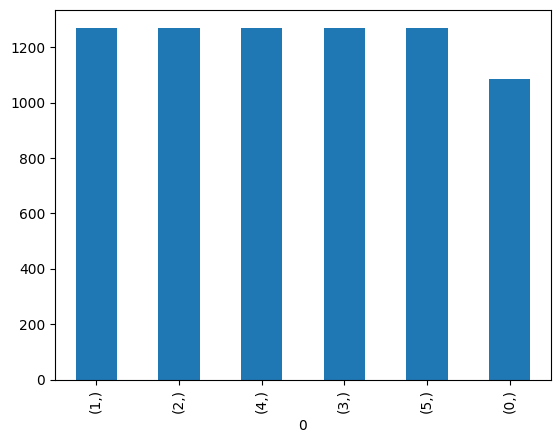

In [ ]:
ls = pd.DataFrame(labels)
ls.value_counts()
ls.value_counts().plot(kind='bar')

In [ ]:
y = to_categorical(y)
print(f"One-hot encoded labels shape: {y.shape}")
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ensure there are no NaNs or infinities in your data
x_train = np.nan_to_num(x_train, nan=np.mean(x_train, axis=0))
x_test = np.nan_to_num(x_test, nan=np.mean(x_test, axis=0))

# Normalize or standardize your data if needed
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Expand dimensions to fit Conv1D input shape
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


One-hot encoded labels shape: (7442, 6)


In [ ]:
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Labels shape: {y_train.shape}")
print(f"Labels shape: {y_test.shape}")

Training data shape: (5953, 40, 1)
Testing data shape: (1489, 40, 1)
Labels shape: (5953, 6)
Labels shape: (1489, 6)


In [ ]:
audio_emotion = Sequential()
audio_emotion.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
audio_emotion.add(BatchNormalization(axis=-1))
audio_emotion.add(Conv1D(64, kernel_size=3, activation='relu'))
audio_emotion.add(BatchNormalization(axis=-1))
audio_emotion.add(Dropout(0.3))
audio_emotion.add(Flatten())  # Flatten before the Dense layers
audio_emotion.add(Dense(128, activation='relu'))
audio_emotion.add(Dropout(0.3))
audio_emotion.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=1e-4)
audio_emotion.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
audio_emotion.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 36, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 308,934 (1.18 MB)

 Trainable params: 308,678 (1.18 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.2418 - loss: 2.4321 - val_accuracy: 0.2438 - val_loss: 1.7476
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3549 - loss: 1.8171 - val_accuracy: 0.3432 - val_loss: 1.5322
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3804 - loss: 1.6647 - val_accuracy: 0.4285 - val_loss: 1.3995
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4218 - loss: 1.5309 - val_accuracy: 0.4480 - val_loss: 1.3884
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4398 - loss: 1.4713 - val_accuracy: 0.4520 - val_loss: 1.3719
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4503 - loss: 1.4252 - val_accuracy: 0.4446 - val_loss: 1.3559
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4774 - loss: 1.3815 - val_accuracy: 0.4574 - val_loss: 1.3500
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4784 - loss: 1.3315 - val_ac

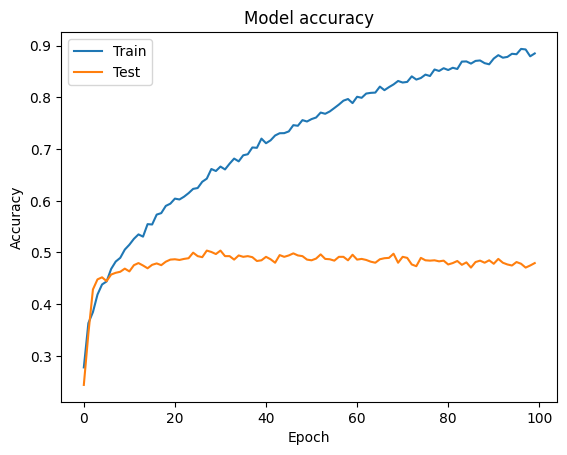

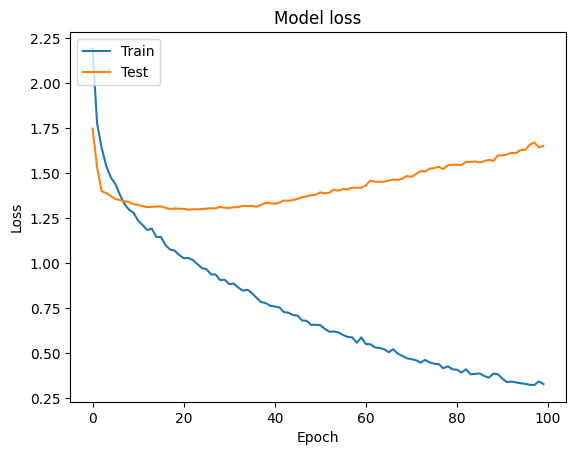

In [ ]:
history = audio_emotion.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')



































































































































plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
audio_emotion.save('/content/drive/MyDrive/kaggle/audio_emotion.h5')